# ANVISA Twitter Analysis

In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import json
import re
!pip install unidecode
import unidecode
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.2 MB/s 


In [2]:
entity = 'anvisa'
agency_twitter = 'anvisa_oficial'

In [3]:
# setup security 
access_token = 'your_tokn'
access_token_secret = 'your_token'
consumer_key = 'your_token'
consumer_secret = 'your_token'

In [4]:
# setup file store
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/'
file = path_drive + entity + '/' + entity + '_tweets.json'
edges_file = path_drive + entity + '/' + entity + '_hashtags.csv'

Mounted at /content/drive/


# Getting tweets

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name, filew):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    alltweets = []

    new_tweets = api.user_timeline(screen_name = screen_name,count=200,tweet_mode='extended')

    for tweet in new_tweets:
        json_str = json.dumps(tweet._json)
        filew.write(json_str + '\n')
    
    alltweets.extend(new_tweets)

    oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))

        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode='extended')

        for tweet in new_tweets:
            json_str = json.dumps(tweet._json)
            filew.write(json_str + '\n')
        
        alltweets.extend(new_tweets)

        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))
        
filew = open(file, 'w')
get_all_tweets(agency_twitter, filew)
filew.close()


getting tweets before 1472935420908425216
...400 tweets downloaded so far
getting tweets before 1453798521220603905
...600 tweets downloaded so far
getting tweets before 1423652799112437768
...800 tweets downloaded so far
getting tweets before 1392873081052573699
...1000 tweets downloaded so far
getting tweets before 1362080299857895426
...1200 tweets downloaded so far
getting tweets before 1319704261656281087
...1400 tweets downloaded so far
getting tweets before 1270434723500867586
...1600 tweets downloaded so far
getting tweets before 1250449669253140479
...1800 tweets downloaded so far
getting tweets before 1234876494779953152
...2000 tweets downloaded so far
getting tweets before 1203051682944495615
...2200 tweets downloaded so far
getting tweets before 1177659688080564229
...2400 tweets downloaded so far
getting tweets before 1138451354131869696
...2600 tweets downloaded so far
getting tweets before 1126562572122116095
...2800 tweets downloaded so far
getting tweets before 111101

## Hashtags network

In [ ]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    texts.append(tweet['full_text'])

print(len(texts))

3250


In [ ]:
## get hashtags
def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))

def normalize_text(s):
    s = re.sub(r'[^\w\s]','',s)
    s = s.lower()
    s = unidecode.unidecode(s)
    return s

allhashtags = set()
hashtagsList = []
for i, text in enumerate(texts):
    wordList = extract_hash_tags(text)
    if wordList:
        hashtags = [normalize_text(w) for w in wordList]
        for w in hashtags:
            allhashtags.add(w)
        print(i, wordList, hashtags)
        hashtagsList.append(hashtags)

print('\n### Tamanho total do conjunto de hashtags:', len(allhashtags))
print('\n### Quantidade de listas de hashtags:', len(hashtagsList))

21 {'regulacaosanitaria', 'transparencia', 'anvisa'} ['regulacaosanitaria', 'transparencia', 'anvisa']
43 {'covid19', 'coleta', 'autotestescovid19', 'regulacaosanitaria', 'anvisa', 'autoteste'} ['covid19', 'coleta', 'autotestescovid19', 'regulacaosanitaria', 'anvisa', 'autoteste']
103 {'anvisa', 'sus'} ['anvisa', 'sus']
105 {'anvisa', 'doacaodesangue'} ['anvisa', 'doacaodesangue']
106 {'transparencia', 'anvisa'} ['transparencia', 'anvisa']
137 {'farmacêuticos', 'farmacêuticas'} ['farmaceuticos', 'farmaceuticas']
175 {'anvisa', 'peticionamento'} ['anvisa', 'peticionamento']
176 {'anvisa', 'cannabis'} ['anvisa', 'cannabis']
177 {'vacina', 'covid19', 'anvisa', 'coronavirus'} ['vacina', 'covid19', 'anvisa', 'coronavirus']
179 {'dispositivosmedicos', 'anvisa'} ['dispositivosmedicos', 'anvisa']
183 {'cbpf', 'transparencia', 'anvisa'} ['cbpf', 'transparencia', 'anvisa']
184 {'transparencia', 'anvisa'} ['transparencia', 'anvisa']
185 {'anvisa', 'dcb'} ['anvisa', 'dcb']
187 {'dispositivosmedico

In [ ]:
## normalizing hashtaghs
def normalize(hashtag):
    if hashtag == 'plástico': return 'plastico'
    return hashtag
  

for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        hashtags[i] = normalize(hashtags[i])

In [ ]:
## building the network
edges = {}
for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            key = hashtags[i] + '-' + hashtags[j]
            edge = (hashtags[i], hashtags[j], 1)
            if key in edges:
                (h1, h2, w) = edges[key]
                edge = (h1, h2, w+1)
                edges.update( {key : edge} )
            else:
                edges.update( {key : edge} )
            print(edge)

('regulacaosanitaria', 'transparencia', 1)
('regulacaosanitaria', 'anvisa', 1)
('transparencia', 'anvisa', 1)
('covid19', 'coleta', 1)
('covid19', 'autotestescovid19', 1)
('covid19', 'regulacaosanitaria', 1)
('covid19', 'anvisa', 1)
('covid19', 'autoteste', 1)
('coleta', 'autotestescovid19', 1)
('coleta', 'regulacaosanitaria', 1)
('coleta', 'anvisa', 1)
('coleta', 'autoteste', 1)
('autotestescovid19', 'regulacaosanitaria', 1)
('autotestescovid19', 'anvisa', 1)
('autotestescovid19', 'autoteste', 1)
('regulacaosanitaria', 'anvisa', 2)
('regulacaosanitaria', 'autoteste', 1)
('anvisa', 'autoteste', 1)
('anvisa', 'sus', 1)
('anvisa', 'doacaodesangue', 1)
('transparencia', 'anvisa', 2)
('farmaceuticos', 'farmaceuticas', 1)
('anvisa', 'peticionamento', 1)
('anvisa', 'cannabis', 1)
('vacina', 'covid19', 1)
('vacina', 'anvisa', 1)
('vacina', 'coronavirus', 1)
('covid19', 'anvisa', 2)
('covid19', 'coronavirus', 1)
('anvisa', 'coronavirus', 1)
('dispositivosmedicos', 'anvisa', 1)
('cbpf', 'transp

In [ ]:
## generating edges file
filew = open(edges_file, 'w')
filew.write('Source,Target,weight\n')
print('Source,Target,weight')
for key, edge in edges.items():
    (h1,h2,w) = edge
    if h1 and h2:
        edgeLine = h1 + ',' + h2 + ',' + str(w)
        print(edgeLine)
        filew.write(edgeLine + '\n')
        
filew.close()    

Source,Target,weight
regulacaosanitaria,transparencia,1
regulacaosanitaria,anvisa,2
transparencia,anvisa,7
covid19,coleta,1
covid19,autotestescovid19,1
covid19,regulacaosanitaria,1
covid19,anvisa,92
covid19,autoteste,1
coleta,autotestescovid19,1
coleta,regulacaosanitaria,1
coleta,anvisa,1
coleta,autoteste,1
autotestescovid19,regulacaosanitaria,1
autotestescovid19,anvisa,1
autotestescovid19,autoteste,1
regulacaosanitaria,autoteste,1
anvisa,autoteste,1
anvisa,sus,8
anvisa,doacaodesangue,2
farmaceuticos,farmaceuticas,1
anvisa,peticionamento,5
anvisa,cannabis,2
vacina,covid19,28
vacina,anvisa,37
vacina,coronavirus,30
covid19,coronavirus,72
anvisa,coronavirus,97
dispositivosmedicos,anvisa,6
cbpf,transparencia,1
cbpf,anvisa,1
anvisa,dcb,4
dispositivosmedicos,rdc579,1
anvisa,rdc579,1
sus,inca,1
sus,anvisa,7
sus,doacaodemedula,1
sus,transplantedemedula,1
sus,redome,1
inca,anvisa,1
inca,doacaodemedula,1
inca,transplantedemedula,1
inca,redome,1
anvisa,doacaodemedula,1
anvisa,transplantedemedula,

# Engagement analysis

In [5]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    engaged = tweet['retweet_count'] + tweet['favorite_count'] + len(tweet['entities']['user_mentions'])
    texts.append([tweet['id_str'],tweet['created_at'],tweet['retweet_count'],tweet['favorite_count'],len(tweet['entities']['user_mentions']),tweet['is_quote_status'],engaged,tweet['full_text']])

columns = ['id','created_at','rt_count','fav_count','mentions_count','is_quote','engaged','text']
df = pd.DataFrame(texts, columns=columns)
total_tweets = len(df)
print('Total tweets: ', total_tweets)

df.head()

Total tweets:  3250


id                      created_at  rt_count  fav_count  \
0  1509595098346045444  Thu Mar 31 18:14:53 +0000 2022         2         21   
1  1509588022689468433  Thu Mar 31 17:46:46 +0000 2022         2         20   
2  1509569737826701316  Thu Mar 31 16:34:06 +0000 2022         4         15   
3  1509511851092197387  Thu Mar 31 12:44:05 +0000 2022         1          5   
4  1509199426916605953  Wed Mar 30 16:02:37 +0000 2022         5         19   

   mentions_count  is_quote  engaged  \
0               0     False       23   
1               0     False       22   
2               0     False       19   
3               0     False        6   
4               0     False       24   

                                                                                                                                                                                                                                                                                                              text  
0  A Anvisa aprovou a autorização temporária de uso emergencial do medicamento Paxlovid para tratamento da Covid-19. O medicamento é indicado para pacientes adultos que não requerem oxigênio suplementar e apresentam risco de progressão para Covid-19 grave. \nhttps://t.co/6wPsNgXOBc https://t.co/PRX404Fbf4  
1   Neste Dia da Saúde e da Nutrição é importante pararmos para refletir sobre os hábitos alimentares e a prática regular de atividades físicas. Vale lembrar que para se ter uma boa nutrição é preciso manter uma dieta equilibrada, com quantidade e variedade adequadas de nutrientes. https://t.co/eusIPkqCZL  
2                       Foram aprovados mais cinco autotestes para Covid-19. Até o momento, a Anvisa já autorizou 17 autotestes. A lista completa dos autotestes registrados, atualizada periodicamente, está disponível em nosso portal, num painel eletrônico (https://t.co/456vIxf86p). https://t.co/nEfNL88a4F  
3                         A nutrivigilância trata da vigilância de eventos adversos decorrentes do consumo de alimentos industrializados e do monitoramento da segurança desses produtos. \nPara relatar um evento adverso ou queixa técnica, acesse o Notivisa (https://t.co/KbnVcZKxfN). https://t.co/kVHXMUodie  
4            Cosmetovigilância é o monitoramento de eventos adversos após o uso de perfumes, produtos de higiene pessoal e de embelezamento notificados pelos usuários. O objetivo é acompanhar os relatos desses casos e gerar alertas a fim de evitar que outras pessoas sejam afetadas. https://t.co/TtQDAlEDb8

In [6]:
## counting number of engaged tweets
def engaged_tweets(df):
    #return df[(df.rt_count > 0) | (df.fav_count > 0)].count()
    return df[(df.engaged > 0)].count()

def not_engaged_tweets(df):
    return df[(df.engaged == 0)].count()

def engaged_rt_tweets(df):
    return df[(df.rt_count > 0)].count()

def engaged_fav_tweets(df):
    return df[(df.fav_count > 0)].count()

def engaged_mention_tweets(df):
    return df[(df.mentions_count > 0)].count()

sum_engaged_tweets = engaged_tweets(df)
print('Engaged tweets: ', sum_engaged_tweets['rt_count'], sum_engaged_tweets['rt_count']*100/total_tweets)
sum_engaged_rt_tweets = engaged_rt_tweets(df)
print('Engaged rt tweets: ', sum_engaged_rt_tweets['rt_count'], sum_engaged_rt_tweets['rt_count']*100/sum_engaged_tweets['rt_count'])
sum_engaged_fav_tweets = engaged_fav_tweets(df)
print('Engaged fav tweets: ', sum_engaged_fav_tweets['fav_count'], sum_engaged_fav_tweets['fav_count']*100/sum_engaged_tweets['fav_count'])
sum_engaged_mention_tweets = engaged_mention_tweets(df)
print('Engaged mention tweets: ', sum_engaged_mention_tweets['mentions_count'], sum_engaged_mention_tweets['mentions_count']*100/sum_engaged_tweets['mentions_count'])
sum_not_engaged_tweets = not_engaged_tweets(df)
print('Not Engaged tweets: ', sum_not_engaged_tweets['rt_count'], sum_not_engaged_tweets['rt_count']*100/total_tweets)

Engaged tweets:  3206 98.64615384615385
Engaged rt tweets:  2477 77.26138490330631
Engaged fav tweets:  3025 94.35433562071117
Engaged mention tweets:  514 16.03243917654398
Not Engaged tweets:  44 1.353846153846154


In [7]:
## getting most engaged tweets

df = df.sort_values(by=['engaged'],ascending=False)
df.head(10)

id                      created_at  rt_count  \
1722  1240795011630981120  Fri Mar 20 00:19:18 +0000 2020      3600   
625   1420520305999679492  Wed Jul 28 23:03:27 +0000 2021      4669   
1051  1353775569691938816  Mon Jan 25 18:43:42 +0000 2021       612   
936   1371575427681116163  Mon Mar 15 21:33:59 +0000 2021       341   
337   1464289732507090947  Fri Nov 26 17:47:32 +0000 2021       411   
1113  1337726691003797505  Sat Dec 12 11:51:11 +0000 2020       532   
209   1471510284590358532  Thu Dec 16 15:59:25 +0000 2021       237   
1588  1251619355709845504  Sat Apr 18 21:11:23 +0000 2020      1451   
836   1386873899753820161  Tue Apr 27 02:44:39 +0000 2021       219   
1061  1350785536638808065  Sun Jan 17 12:42:22 +0000 2021       167   

      fav_count  mentions_count  is_quote  engaged  \
1722       7031               0     False    10631   
625           0               1     False     4670   
1051       3308               0     False     3920   
936        2014               0     False     2355   
337        1636               0     False     2047   
1113       1165               0     False     1697   
209        1241               0     False     1478   
1588          0               1     False     1452   
836         662               0     False      881   
1061        666               0     False      833   

                                                                                                                                                                                                                                                                                                                    text  
1722    Diante das notícias sobre uso de medicamentos que contêm hidroxicloroquina e cloroquina para tratar a Covid-19, a Anvisa esclarece que não há estudos conclusivos que comprovam o uso desses medicamentos para o tratamento do novo coronavírus. Leia a matéria: https://t.co/RduV5WdeNA https://t.co/yOVxhlXgxr  
625                                                                                                                                                                     RT @Rayssa_Leal_Sk8: Recadinho para a galerinha de Imperatriz 👇\n\nTô cheganuuu! Só vai rolar 👋🏽 de longe, sem aglomeração 😷\n\nSe cuidem! Usem…  
1051  Confira a tabela com as características das vacinas autorizadas para uso emergencial (CoronaVac, do Instituto Butantan, e Covishield, da Fiocruz) e também as respectivas bulas para profissionais de saúde e pacientes.\n\nhttps://t.co/eoYY4PbLgp\n#anvisa #coronavirus #covid19 #vacina https://t.co/0qHsxAENcL  
936           O lote da vacina de Oxford que teve o uso suspenso pelas autoridades europeias não veio para o Brasil. Nas bases de dados nacionais, que reúnem os eventos adversos ocorridos com vacinas, não há registros de embolia ou trombose associados às vacinas.\nhttps://t.co/AuZZb6V0aq https://t.co/1TKhKrCywu  
337      A Anvisa recomenda medidas restritivas para voos e viajantes procedentes da África do Sul, Botsuana, Eswatini, Lesoto, Namíbia e Zimbábue, em decorrência de nova variante do SARS-CoV-2. Confira a Nota Técnica 203/2021 com orientação ao governo brasileiro. https://t.co/U0Gq2aA0at https://t.co/xUpGhaNFv4  
1113      Você já conferiu como está a apresentação de documentos das empresas que estão desenvolvendo vacinas contra a Covid 19 no Brasil? O quadro foi atualizado (12/12/2020) com o pedido de duas empresas à Anvisa da CBPF. Fique por dentro da análise das vacinas https://t.co/SQa9VlWatR https://t.co/UYgsoW2R7Q  
209             A Anvisa autorizou hoje o pedido da Pfizer para utilização de sua vacina contra Covid-19 em crianças de 5 a 11 anos. O pedido foi avaliado em 21 dias, descontados os 14 dias que o laboratório utilizou para responder as exigências técnicas. \nAcesse https://t.co/dKkQzDEYxC https://t.co/BsF6FtFDIQ  
1588                                                                                                                          

In [8]:
## getting collect period
pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y").sort_values()

3249   2019-02-01 10:57:36
3248   2019-02-01 11:05:38
3247   2019-02-01 12:00:17
3246   2019-02-01 17:02:45
3245   2019-02-01 18:38:08
               ...        
4      2022-03-30 16:02:37
3      2022-03-31 12:44:05
2      2022-03-31 16:34:06
1      2022-03-31 17:46:46
0      2022-03-31 18:14:53
Name: created_at, Length: 3250, dtype: datetime64[ns]

In [9]:
## most mentioned users
with open(file, 'r') as f:
    alltweets = f.readlines()

mentions = {}
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    user_mentions = tweet['entities']['user_mentions']
    for user in user_mentions:
        key = user['screen_name']
        if key in mentions:
            count = mentions[key]
            mentions.update( {key : count+1} )
        else:
            mentions.update( {key : 1} )
        
for w in sorted(mentions, key=mentions.get, reverse=True):
    print(w, mentions[w])


anvisa_oficial 43
minsaude 22
secsaudedf 20
YouTube 19
ConassOficial 19
makibmtlk 18
ebcnarede 14
Medicina_CFM 14
saudeprefsp 13
SaudeMG 12
ElzaSoares 10
PrefManaus 10
MinEconomia 9
comunicacns 9
imprensacff 9
DigitalGovBr 8
SesapRN 8
agencia_fiocruz 8
CanalSaude 8
visa_rio 8
VisaGoiania 7
Cofen_oficial 7
faustdcjr 6
butantanoficial 6
LeoHistor 6
soninhaz 6
Visa_Arapiraca 6
Saude_Recife 6
PrefSalvador 6
BiancaThi1 5
anvisa 5
visatimbo 5
RevistaSaude 5
RadioagenciaEBC 5
SemsaManaus 5
Curitiba_PMC 5
governosp 5
marcelams1511 4
fe_passos 4
AlexandreLit 4
Suzanne47510225 4
oAlienigina 4
priveneza 4
Didi70282640 4
LineLemos21 4
RenataMaC2 4
_deinha13 4
leticiabanffy 4
CNI_br 4
lourdinha_paiva 4
carol_caqqe 4
Mi_Rikaz 4
RobertaRosas 4
LeonardoNascim1 4
OuvidoriaAnvisa 4
tizdias 4
visatx 4
tvcamara 4
FNN_Brasil 4
RegianeSBraga 4
prefeitura_CBA 4
ABRASCO 4
SESAI_MS 4
sesoficial 4
governosergipe 4
GovernoES 4
saudegoias 4
Fabifecchio 4
MTurismo 4
economiagovbr 4
Gabiacansada 3
silmagyar 3
van_b

# Temporal Analysis

In [10]:
total = len(df)
print('Total number of tweets: ', total)

Total number of tweets:  3250


Text(0.5, 1.0, 'anvisa tweets distribution per month')

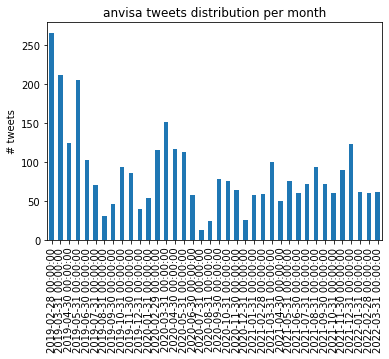

In [11]:
## temporal analysis
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="M"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per month')

Text(0.5, 1.0, 'anvisa tweets distribution per week')

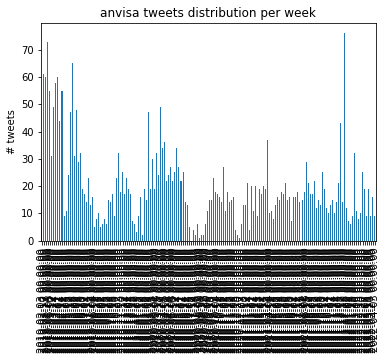

In [12]:
## temporal analysis
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="W"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per week')

Text(0.5, 1.0, 'anvisa number of tweets per day')

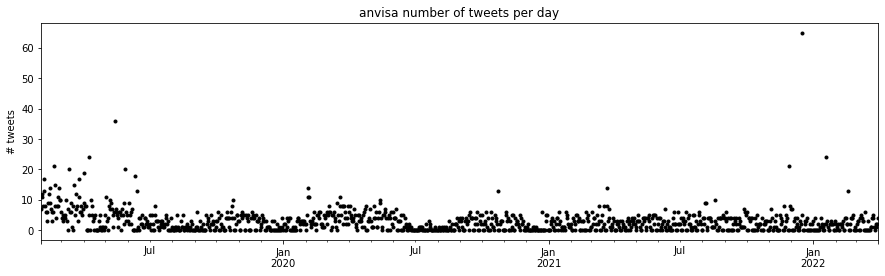

In [13]:
## temporal analysis
import numpy
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
g['id'].count().plot(style="k.")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' number of tweets per day')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 1080x288 with 0 Axes>

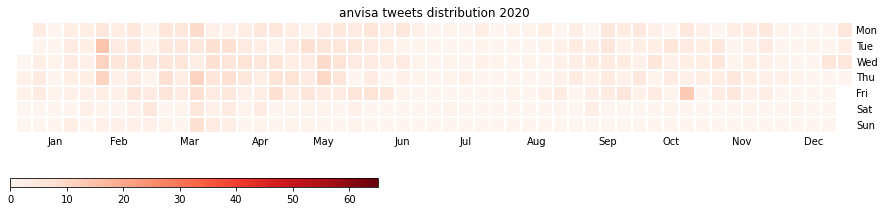

In [14]:
## temporal analysis
import numpy
!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2020
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

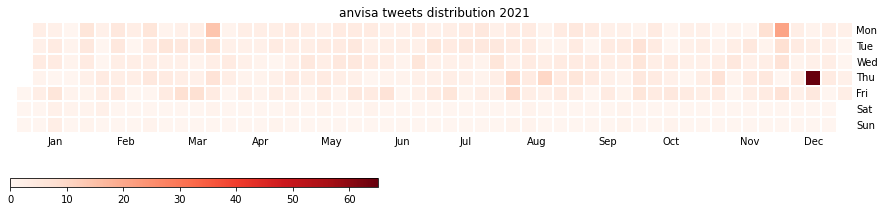

In [15]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2021
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

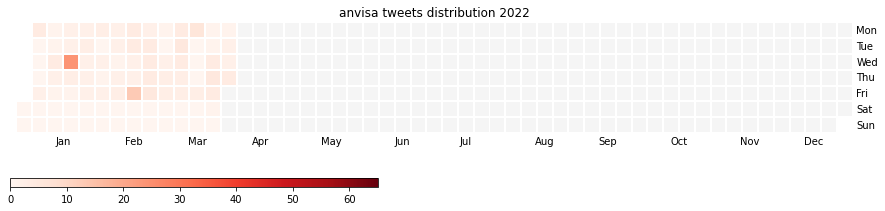

In [16]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2022
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

Text(0.5, 1.0, 'anvisa tweets distribution per hour')

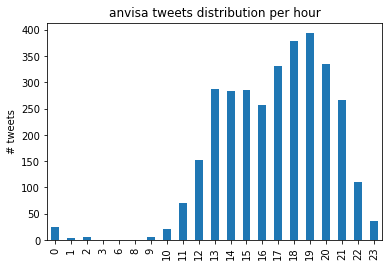

In [17]:
df.groupby(df['date'].dt.hour)['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per hour')

# Trending analysis

In [18]:
import datetime
baseline_str = '2019-02-01'
baseline_date = datetime.datetime.strptime(baseline_str, '%Y-%m-%d')
baseline_date = baseline_date.date()
df['just_date'] = df['date'].apply(datetime.datetime.date)
baseline = df[df['just_date'] == baseline_date]
baseline_count = 0
if len(baseline) > 0:
    baseline_count = baseline.groupby('just_date').count()['id'][0]
print(baseline_count)

7


In [19]:
import math

def change_function(count):
    if math.isnan(count):
        count = 0
    if count == baseline_count:
        return 0
    change = 100*(count-baseline_count)/baseline_count
    return change

df_grouped = df.groupby('just_date', as_index=False).count()
df_grouped['change'] = df_grouped['date'].apply(change_function)
df_grouped.head(5)

just_date  id  created_at  rt_count  fav_count  mentions_count  is_quote  \
0  2019-02-01   7           7         7          7               7         7   
1  2019-02-02  11          11        11         11              11        11   
2  2019-02-03  12          12        12         12              12        12   
3  2019-02-04   8           8         8          8               8         8   
4  2019-02-05  17          17        17         17              17        17   

   engaged  text  date      change  
0        7     7     7    0.000000  
1       11    11    11   57.142857  
2       12    12    12   71.428571  
3        8     8     8   14.285714  
4       17    17    17  142.857143

In [20]:
import datetime as dt
# generate pandas with reference_date from 2020-01-01 to 2022-02-01
start = datetime.datetime.strptime("01-02-2019", "%d-%m-%Y")
end = datetime.datetime.strptime("01-02-2022", "%d-%m-%Y")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

agencies_df = pd.DataFrame()
agencies_df['date_created'] = date_generated
agencies_df['date_created'] = agencies_df['date_created'].map(lambda x: x.date())
print(len(agencies_df))
agencies_df.head()

1096


date_created
0   2019-02-01
1   2019-02-02
2   2019-02-03
3   2019-02-04
4   2019-02-05

In [21]:
agencies_df = pd.merge(agencies_df, df_grouped, how='left', left_on='date_created', right_on='just_date')
agencies_df['change'] = agencies_df['date'].apply(change_function)
agencies_df = agencies_df.sort_values(by='date_created')
agencies_df['order'] = range(1, 1+len(agencies_df))
agencies_df.head()

date_created   just_date    id  created_at  rt_count  fav_count  \
0   2019-02-01  2019-02-01   7.0         7.0       7.0        7.0   
1   2019-02-02  2019-02-02  11.0        11.0      11.0       11.0   
2   2019-02-03  2019-02-03  12.0        12.0      12.0       12.0   
3   2019-02-04  2019-02-04   8.0         8.0       8.0        8.0   
4   2019-02-05  2019-02-05  17.0        17.0      17.0       17.0   

   mentions_count  is_quote  engaged  text  date      change  order  
0             7.0       7.0      7.0   7.0   7.0    0.000000      1  
1            11.0      11.0     11.0  11.0  11.0   57.142857      2  
2            12.0      12.0     12.0  12.0  12.0   71.428571      3  
3             8.0       8.0      8.0   8.0   8.0   14.285714      4  
4            17.0      17.0     17.0  17.0  17.0  142.857143      5

In [22]:
agencies_df.tail(42)

date_created   just_date    id  created_at  rt_count  fav_count  \
1054   2021-12-21  2021-12-21   2.0         2.0       2.0        2.0   
1055   2021-12-22  2021-12-22   3.0         3.0       3.0        3.0   
1056   2021-12-23  2021-12-23   4.0         4.0       4.0        4.0   
1057   2021-12-24         NaN   NaN         NaN       NaN        NaN   
1058   2021-12-25         NaN   NaN         NaN       NaN        NaN   
1059   2021-12-26         NaN   NaN         NaN       NaN        NaN   
1060   2021-12-27  2021-12-27   2.0         2.0       2.0        2.0   
1061   2021-12-28         NaN   NaN         NaN       NaN        NaN   
1062   2021-12-29         NaN   NaN         NaN       NaN        NaN   
1063   2021-12-30  2021-12-30   2.0         2.0       2.0        2.0   
1064   2021-12-31  2021-12-31   3.0         3.0       3.0        3.0   
1065   2022-01-01         NaN   NaN         NaN       NaN        NaN   
1066   2022-01-02         NaN   NaN         NaN       NaN        NaN   
1067   2022-01-03  2022-01-03   4.0         4.0       4.0        4.0   
1068   2022-01-04         NaN   NaN         NaN       NaN        NaN   
1069   2022-01-05         NaN   NaN         NaN       NaN        NaN   
1070   2022-01-06         NaN   NaN         NaN       NaN        NaN   
1071   2022-01-07  2022-01-07   2.0         2.0       2.0        2.0   
1072   2022-01-08         NaN   NaN         NaN       NaN        NaN   
1073   2022-01-09         NaN   NaN         NaN       NaN        NaN   
1074   2022-01-10  2022-01-10   1.0         1.0       1.0        1.0   
1075   2022-01-11  2022-01-11   1.0         1.0       1.0        1.0   
1076   2022-01-12  2022-01-12   4.0         4.0       4.0        4.0   
1077   2022-01-13  2022-01-13   2.0         2.0       2.0        2.0   
1078   2022-01-14  2022-01-14   1.0         1.0       1.0        1.0   
1079   2022-01-15         NaN   NaN         NaN       NaN        NaN   
1080   2022-01-16         NaN   NaN         NaN       NaN        NaN   
1081   2022-01-17  2022-01-17   2.0         2.0       2.0        2.0   
1082   2022-01-18  2022-01-18   2.0         2.0       2.0        2.0   
1083   2022-01-19  2022-01-19  24.0        24.0      24.0       24.0   
1084   2022-01-20  2022-01-20   3.0         3.0       3.0        3.0   
1085   2022-01-21  2022-01-21   1.0         1.0       1.0        1.0   
1086   2022-01-22         NaN   NaN         NaN       NaN        NaN   
1087   2022-01-23         NaN   NaN         NaN       NaN        NaN   
1088   2022-01-24  2022-01-24   2.0         2.0       2.0        2.0   
1089   2022-01-25  2022-01-25   3.0         3.0       3.0        3.0   
1090   2022-01-26  2022-01-26   2.0         2.0       2.0        2.0   
1091   2022-01-27  2022-01-27   2.0         2.0       2.0        2.0   
1092   2022-01-28  2022-01-28   2.0         2.0       2.0        2.0   
1093   2022-01-29         NaN   NaN         NaN       NaN        NaN   
1094   2022-01-30         NaN   NaN         NaN       NaN        NaN   
1095   2022-01-31  2022-01-31   3.0         3.0       3.0        3.0   

      mentions_count  is_quote  engaged  text  date      change  order  
1054             2.0       2.0      2.0   2.0   2.0  -71.428571   1055  
1055             3.0       3.0      3.0   3.0   3.0  -57.142857   1056  
1056             4.0       4.0      4.0   4.0   4.0  -42.857143   1057  
1057             NaN       NaN      NaN   NaN   NaN -100.000000   1058  
1058             NaN       NaN      NaN   NaN   NaN -100.000000   1059  
1059             NaN       NaN      NaN   NaN   NaN -100.000000   1060  
1060             2.0       2.0      2.0   2.0   2.0  -71.428571   1061  
1061             NaN       NaN      NaN   NaN   NaN -100.000000   1062  
1062             NaN       NaN      NaN   NaN   NaN -100.000000   1063  
1063             2.0       2.0      2.0   2.0   2.0  -71.428571   1064  
1064             3.0       3.0      3.0   3.0   3.0  -57.142857   1065  
1065             NaN       NaN  

<Figure size 1080x720 with 0 Axes>

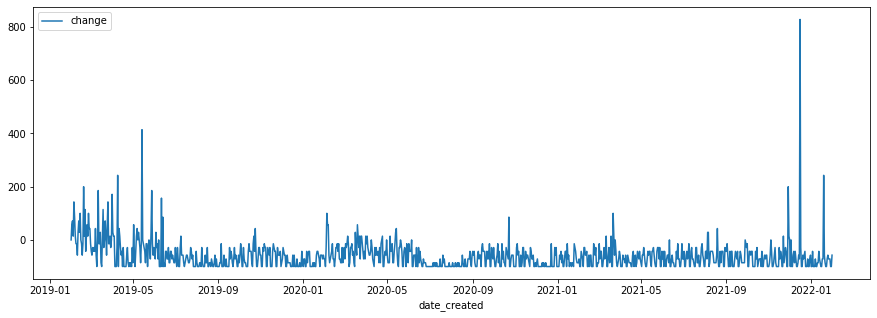

In [23]:
plt.figure(figsize=(15,10))
agencies_df.plot(kind='line', x='date_created', y='change',figsize=(15, 5))
plt.show()

In [27]:
mark_firstcase = agencies_df[agencies_df['date_created']==datetime.date(2020,2,26)]['order'].to_list()[0]
mark_firstmh = agencies_df[agencies_df['date_created']==datetime.date(2020,4,16)]['order'].to_list()[0]
mark_secondmh = agencies_df[agencies_df['date_created']==datetime.date(2020,5,15)]['order'].to_list()[0]
mark_thirdmh = agencies_df[agencies_df['date_created']==datetime.date(2020,6,2)]['order'].to_list()[0]

mark_firstvaccine = agencies_df[agencies_df['date_created']==datetime.date(2020,12,2)]['order'].to_list()[0]
mark_gamma = agencies_df[agencies_df['date_created']==datetime.date(2021,1,6)]['order'].to_list()[0]

mark_brazilvaccine = agencies_df[agencies_df['date_created']==datetime.date(2021,1,17)]['order'].to_list()[0]
mark_fourthmh = agencies_df[agencies_df['date_created']==datetime.date(2021,3,23)]['order'].to_list()[0]
mark_deadliest = agencies_df[agencies_df['date_created']==datetime.date(2021,3,29)]['order'].to_list()[0]
mark_cpi = agencies_df[agencies_df['date_created']==datetime.date(2021,4,27)]['order'].to_list()[0]
mark_omicron = agencies_df[agencies_df['date_created']==datetime.date(2021,11,26)]['order'].to_list()[0]
mark_topcases = agencies_df[agencies_df['date_created']==datetime.date(2022,1,27)]['order'].to_list()[0]

list_marks = [mark_firstcase, mark_firstmh, mark_secondmh, mark_thirdmh, mark_firstvaccine, mark_gamma,
              mark_brazilvaccine, mark_fourthmh, mark_deadliest, mark_cpi, mark_omicron, mark_topcases]
list_labels = ['1stBraCase', '1stMH', '2ndMH', '3rdMH', '1stVac', 'GAMMA', '1stBraVac', '4thMH', 'BraDeadliest',
               'PCI', 'Omicron','BraTopCases']
list_marks

[391, 441, 470, 488, 671, 706, 717, 782, 788, 817, 1030, 1092]

[-200.    0.  200.  400.  600.  800. 1000. 1200.]
<a list of 8 Text major ticklabel objects>


Text(0.5, -0.2, 'ANVISA')

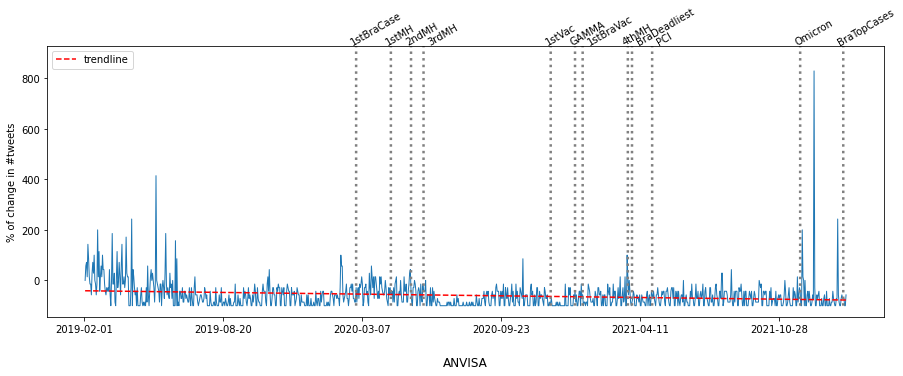

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def adjust_xticks(value):
    if value < 0:
      return ''
    start_date = agencies_df[agencies_df['order']==1]['date_created'][0]
    end_date = start_date + datetime.timedelta(days=value)
    label = str(end_date)
    return label


fig, ax = plt.subplots(figsize=(15,5))

# changes
x = agencies_df['order'].to_numpy()
y = agencies_df['change'].to_numpy()
x_new = np.linspace(x.min(), x.max(),len(agencies_df))
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)
ax.plot (x_new,y_smooth, linewidth=1.0)
ax.set_ylim(top=max(y_smooth)+100)
ax.set_ylabel('% of change in #tweets')

locs, labels = plt.xticks()
print(locs)
print(labels)
ax.set_xticklabels(np.array(list(map(adjust_xticks, locs))))

# baseline
##x_baseline = x
##y_baseline = [0]*len(x)
##line2 = ax.plot(x_baseline, y_baseline, '--', linewidth=0.5,
##                 label='baseline')

# trendline
z = np.polyfit(x.flatten(), y.flatten(), 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", linewidth=1.5, label='trendline')

# marklines
lines = []
reference = 1000
for i, mark in enumerate(list_marks):
  x_covidline = [mark]*1100
  y_covidline = [i for i in range(-100,reference)]
  #x_covidline = [mark]*len(y_smooth)
  #y_covidline = y_smooth
  line = ax.plot(x_covidline, y_covidline, linestyle=':', linewidth=2.5,
                 #label=list_labels[i], 
                 color='gray')
  
  if i in [3, 6, 8, 9]:
    position_x = mark+4
    position_y = reference-70
  else:
    position_x = mark-10
    position_y = reference-70
  ax.annotate(list_labels[i], 
             (position_x, position_y), 
             color='black', rotation=30,
             size=10)
  
  lines.append(line)


ax.legend(loc='upper left',# bbox_to_anchor=(0.5, 1.15),
          ncol=1, fancybox=True)
plt.title('ANVISA', y=-0.2)